
# Hotel Booking Analysis

## Import Libraries and Dependency

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


In [ ]:
# Import libraries yang kita butuhkan
import pandas as pd
import matplotlib.pyplot as plt
import plotly as px
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

## Data Wrangling

In [ ]:
# Mounting ke google drive untuk mengakses dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataset diimport menggunakan pandas sebagai dataframe
# Direktori Kiara
df = pd.read_csv('/content/drive/MyDrive/Dataset/hotels.csv')

# Direktori Alviya
#df = pd.read_csv('/content/drive/MyDrive/MACHINE LEARNING/Dataset/hotels.csv')

In [ ]:
#Memeriksa 5 data pertama pada dataset
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Memeriksa informasi keseluruhan dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
# Memeriksa data yang memiliki duplikasi
duplicates = df.duplicated().sum()
print(f"Banyak kolom duplikat sebelum cleaning: {duplicates}")

Banyak kolom duplikat sebelum cleaning: 31994


In [ ]:
# Menghapus data yang memiliki value duplikasi
df.drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# Memeriksa kembali apakah data yang duplikat sudah terhapus
df.duplicated().sum()

31994

In [ ]:
# Memeriksa apakah ada data null
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
numeric_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(include='object').columns

In [ ]:
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [ ]:
print("\nPreview data clean:")
df.head()


Preview data clean:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,189.266735,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Explanatory Data Analysis

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.000000,0.000000,1.000000,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.000000,69.000000,160.000000,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.000000,2016.000000,2017.000000,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.000000,28.000000,38.000000,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.000000,16.000000,23.000000,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.000000,1.000000,2.000000,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.000000,2.000000,3.000000,50.0
adults,119390.0,1.856403,0.579261,0.00,2.000000,2.000000,2.000000,55.0
children,119390.0,0.103890,0.398555,0.00,0.000000,0.000000,0.000000,10.0
babies,119390.0,0.007949,0.097436,0.00,0.000000,0.000000,0.000000,10.0


In [ ]:
df[categorical_columns]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07


## Analyze Data

Untuk langkah pertama, kita akan melakukan analisa pendapatan dari kedua hotel.

### Pendapatan Pertahun dari Kedua Tipe Hotel

In [ ]:
# Supaya visualisasi memiliki kesamaan warna, maka kita akan menentukan color palette terlebih dahulu
palette = ['#ADD8E6', '#FFC0CB']

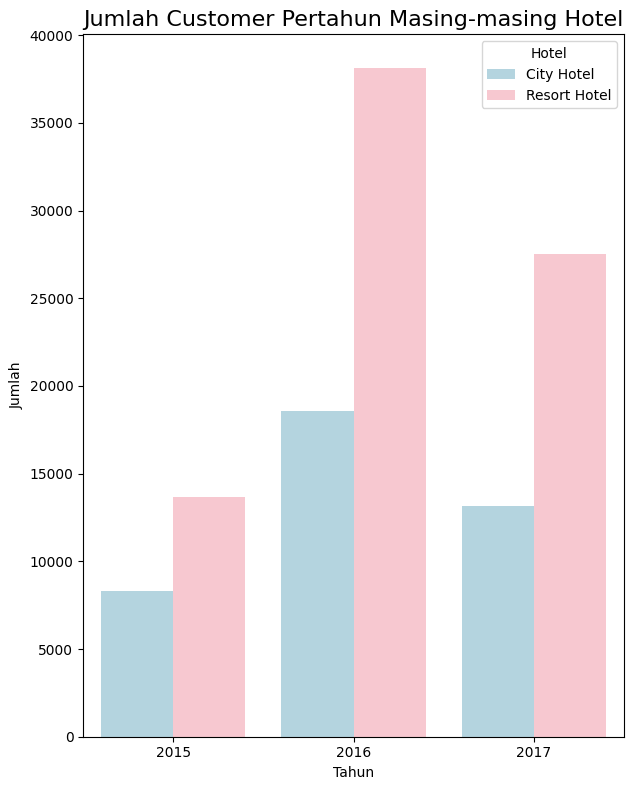

In [ ]:
# Visualisasi barchart menggunakan data dari dataframe
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)

#Disini kita menggunakan data arrival date year sebagai variabel x dan variabel hotel sebagai hue supaya data tervisualisasi berdasarkan tipe hotel
sns.countplot(x='arrival_date_year', hue='hotel', data=df, palette=palette)
plt.title("Jumlah Customer Pertahun Masing-masing Hotel", size=16)

plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.legend(title="Hotel", loc="upper right", labels=['City Hotel', 'Resort Hotel'])

plt.tight_layout()
plt.show()


Pendapatan resort hotel selama tiga tahun berturut - turut lebih tinggi daripada city hotel dengan puncak tertingginya pada tahun 2016. Untuk mengetahui lebih lanjut, kita akan menganalisa tipe customer pada resort hotel

In [ ]:
customer_resort = df[df['hotel']=='Resort Hotel']

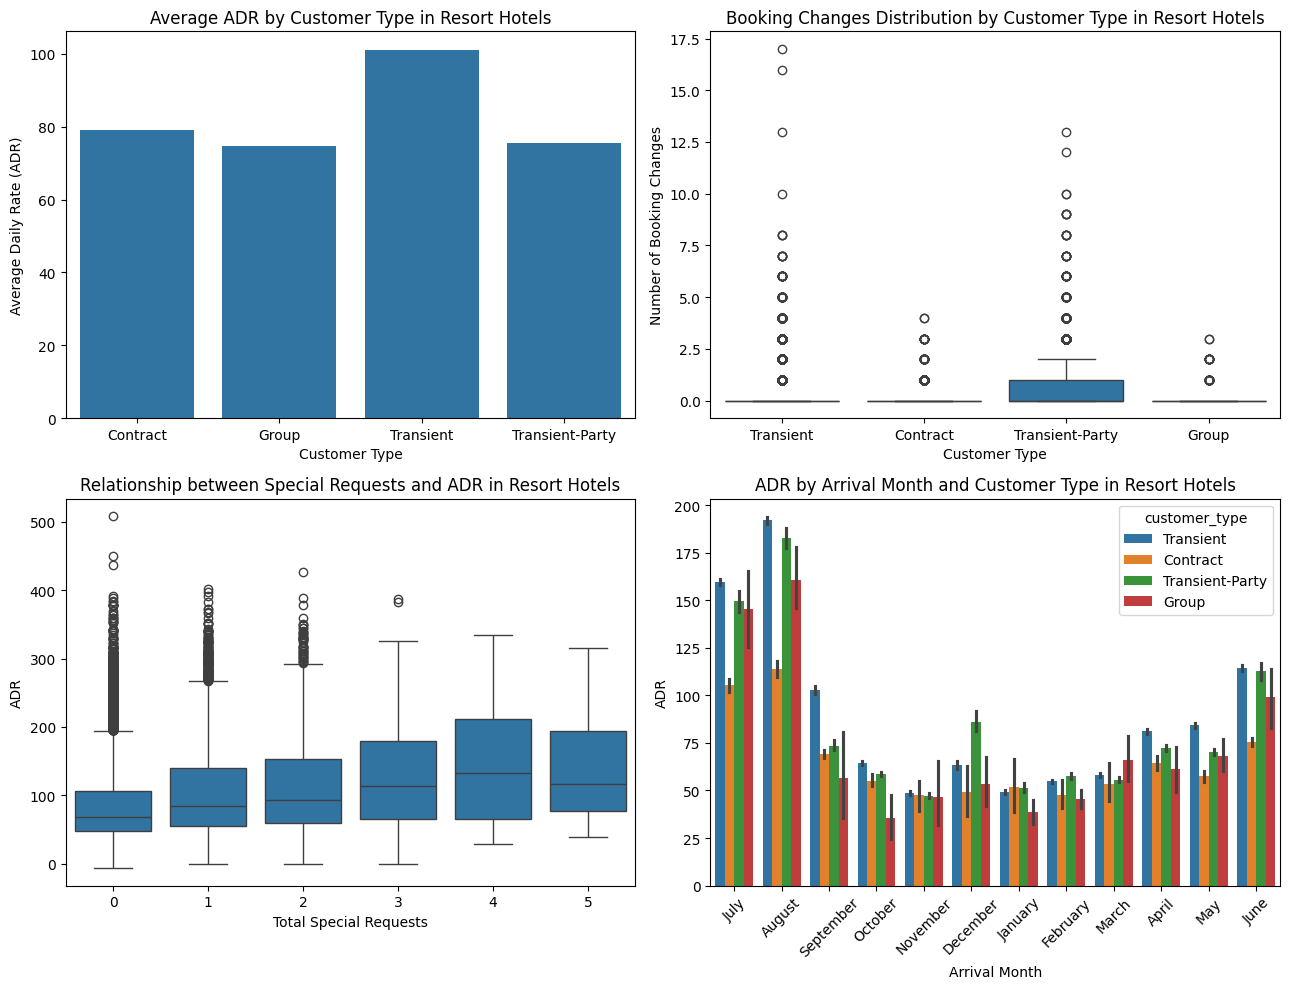

In [ ]:
# Mengelompokkan data berdasarkan jenis pelanggan dan hitung ADR rata-rata untuk setiap jenis
customer_type_adr = customer_resort.groupby('customer_type')['adr'].mean().reset_index()

# Membuat figure dengan layout 2x2
fig, axes = plt.subplots(2, 2, figsize=(13, 10))

# Plot 1: Average ADR by Customer Type
sns.barplot(x='customer_type', y='adr', data=customer_type_adr, ax=axes[0, 0])
axes[0, 0].set_title('Average ADR by Customer Type in Resort Hotels')
axes[0, 0].set_xlabel('Customer Type')
axes[0, 0].set_ylabel('Average Daily Rate (ADR)')

# Plot 2: Booking Changes Distribution by Customer Type
sns.boxplot(x='customer_type', y='booking_changes', data=customer_resort, ax=axes[0, 1])
axes[0, 1].set_title('Booking Changes Distribution by Customer Type in Resort Hotels')
axes[0, 1].set_xlabel('Customer Type')
axes[0, 1].set_ylabel('Number of Booking Changes')

# Plot 3: Relationship between Special Requests and ADR
sns.boxplot(x='total_of_special_requests', y='adr', data=customer_resort,  ax=axes[1, 0])
axes[1, 0].set_title('Relationship between Special Requests and ADR in Resort Hotels')
axes[1, 0].set_xlabel('Total Special Requests')
axes[1, 0].set_ylabel('ADR')

# Plot 4: ADR by Arrival Month and Customer Type
sns.barplot(x='arrival_date_month', y='adr', hue='customer_type', data=customer_resort, ax=axes[1, 1])
axes[1, 1].set_title('ADR by Arrival Month and Customer Type in Resort Hotels')
axes[1, 1].set_xlabel('Arrival Month')
axes[1, 1].set_ylabel('ADR')
axes[1, 1].tick_params(axis='x', rotation=45)

# Mengatur tata letak agar tidak saling bertumpuk
plt.tight_layout()

# Menampilkan visualisasi
plt.show()


### Average Daily Rate Perbulan dari Kedua Tipe Hotel

In [ ]:
# Mengambil data hotel resort dan city yang status bookingnya tidak dibatalkan
# Dengan menggabungkan kedua variabel ini dan memberikan filter (not cancelled) akan membantu kita untuk menemukan ADR
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [ ]:
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

In [ ]:
# Mengelompokkan data ADR berdasarkan bulan kedatangan dan menghitung rata-rata dari ADR
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel['arrival_date_month'] = pd.Categorical(resort_hotel['arrival_date_month'], categories=months_order, ordered=True) # Mengubah 'arrival_date_month' menjadi tipe kategorikal
resort_hotel = resort_hotel.sort_values('arrival_date_month').reset_index(drop=True) # Mengurutkan dataframe berdasarkan kolom

,arrival_date_month,adr
0,January,48.708919
1,February,54.147478
2,March,57.012487
3,April,75.867816
4,May,76.657558
5,June,107.921869
6,July,150.122528
7,August,181.205892
8,September,96.416860
9,October,61.727505


In [ ]:
# Mengelompokkan data ADR berdasarkan bulan kedatangan dan menghitung rata-rata dari ADR
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel['arrival_date_month'] = pd.Categorical(city_hotel['arrival_date_month'], categories=months_order, ordered=True) # Mengubah 'arrival_date_month' menjadi tipe kategorikal
city_hotel = city_hotel.sort_values('arrival_date_month').reset_index(drop=True)

,arrival_date_month,adr
0,January,82.160634
1,February,86.183025
2,March,90.170722
3,April,111.856824
4,May,120.445842
5,June,117.702075
6,July,115.563810
7,August,118.412083
8,September,112.598452
9,October,101.745956


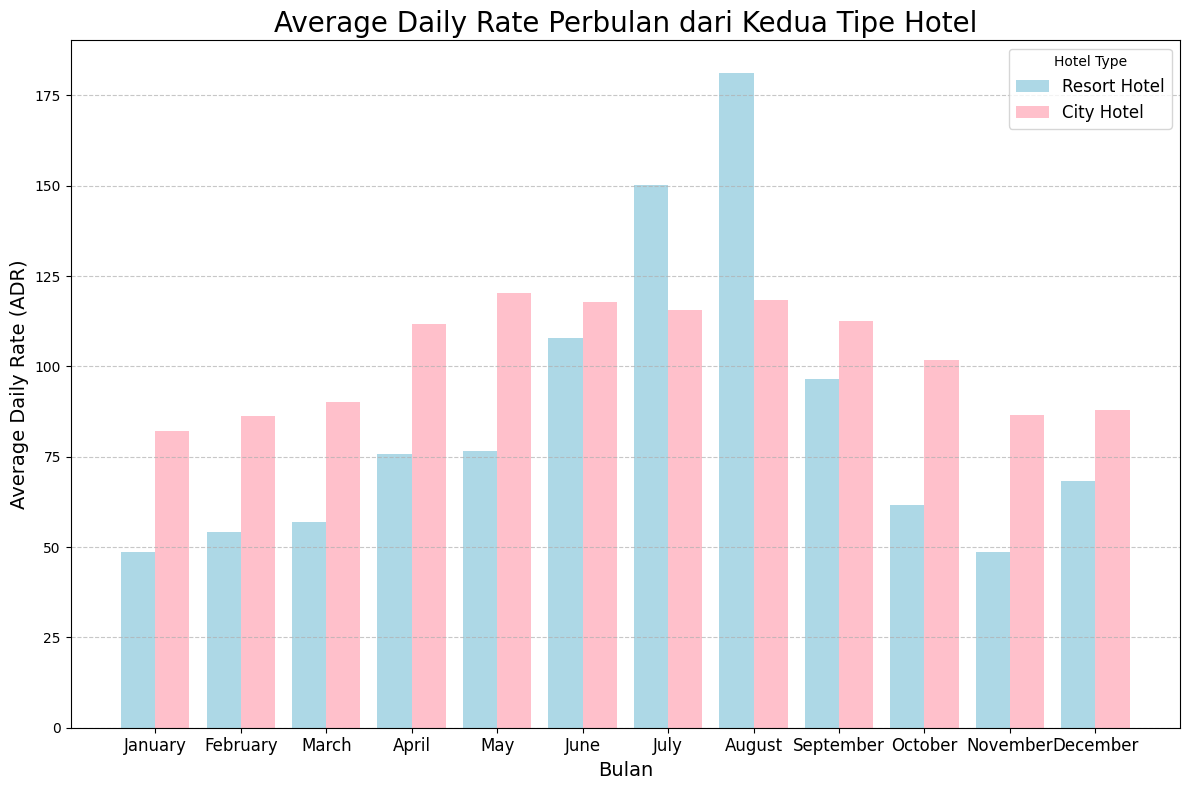

In [ ]:
# Mengatur width bar pada grafik
width=0.4
x = np.arange(len(months_order))

# Visualisasi data
plt.figure(figsize=(12, 8))
plt.bar(x - width/2, resort_hotel['adr'], color='#ADD8E6', width=width, label='Resort Hotel')
plt.bar(x + width/2, city_hotel['adr'], color='#FFC0CB', width=width, label='City Hotel')
plt.title('Average Daily Rate Perbulan dari Kedua Tipe Hotel', size=20, color='black')
plt.xlabel('Bulan', size=14)
plt.ylabel('Average Daily Rate (ADR)', size=14)
plt.xticks(ticks=x, labels=months_order, fontsize=12)
plt.legend(title='Hotel Type', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Pendapatan pada Weekend dan Weekdays Masing-masing Tipe Hotel

In [ ]:
''' Mengelompokkan data penginapan pada weekend dan weekdays pada masing - masing hotel,
    kemudian data dikelompokkan berdasarkan ADR dan menghitung rata - rata
'''
avg_revenue_weekend = df.groupby(['hotel', 'stays_in_weekend_nights'])['adr'].mean().reset_index()
avg_revenue_weekday = df.groupby(['hotel', 'stays_in_week_nights'])['adr'].mean().reset_index()

# Visualisasi Data
fig = go.Figure()
for hotel in avg_revenue_weekend['hotel'].unique():
  fig.add_trace(go.Bar(
      x=[hotel],
      y=avg_revenue_weekend[avg_revenue_weekend['hotel']==hotel]['adr'],
      name='Weekend Average Income',
      visible=True,
      ))

for hotel in avg_revenue_weekday['hotel'].unique():
  fig.add_trace(go.Bar(
      x=[hotel],
      y=avg_revenue_weekday[avg_revenue_weekday['hotel']==hotel]['adr'],
      name='Weekday Average Income',
      visible=True
      ))

In [ ]:
# Memperbarui layout visualisasi agar lebih interaktif
fig.update_layout(
    updatemenus=[
       dict(
            buttons=list([
                dict(label="Weekend",
                     method="update",
                     args=[{"visible": [True, True, False, False]},
                           {"title": "Average Revenue per Day - Weekend"}]),
                dict(label="Weekday",
                     method="update",
                     args=[{"visible": [False, False, True, True]},
                           {"title": "Average Revenue per Day - Weekday"}]),
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"title": "Average Revenue per Day - Both"}])
            ]),
            direction="down",
            showactive=True,
        )
    ], title='Pendapatan Weekend dan Weekdays Masing-masing Hotel',
    xaxis_title = 'Hotel',
    yaxis_title = 'Rata-Rata',
    barmode='group',
    template='seaborn'
)

fig.show()

### Status Reservasi

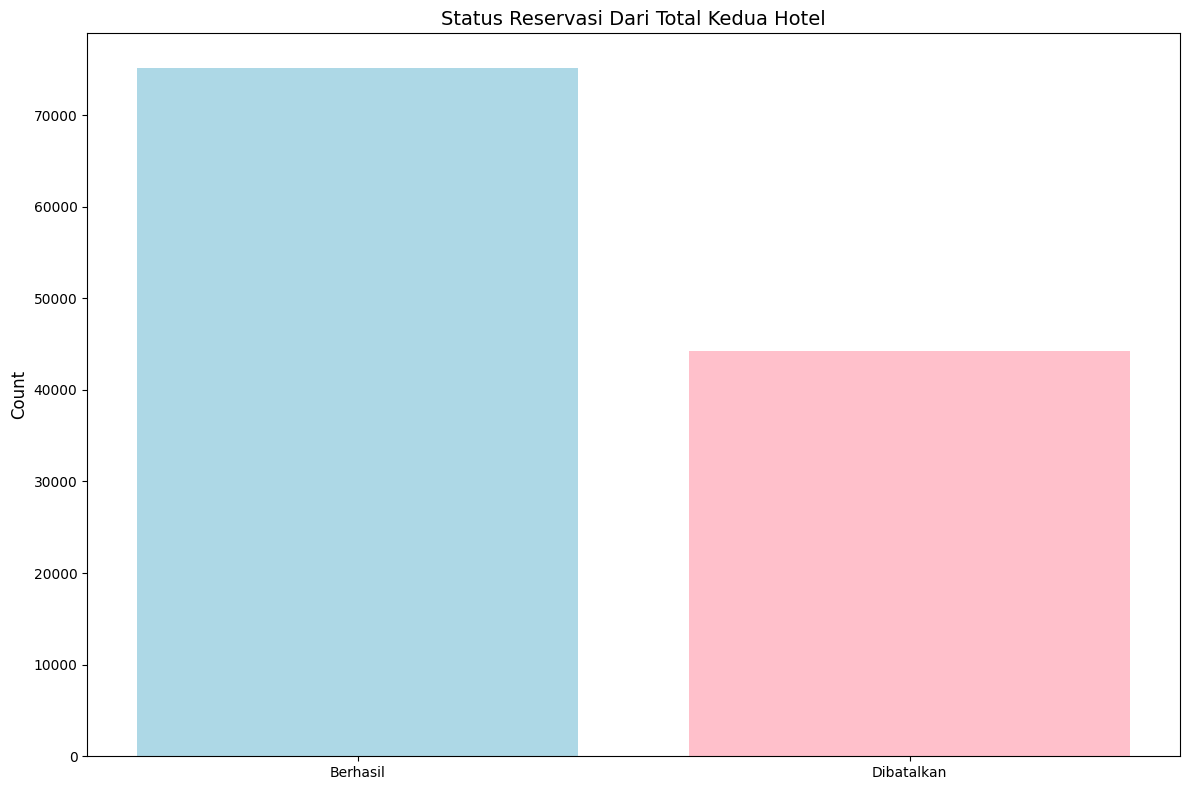

In [ ]:
# Menghitung banyaknya reservasi yang dibatalkan
canceled_reservation = df['is_canceled'].value_counts()
palette = ['#ADD8E6', '#FFC0CB']

plt.figure(figsize=(12, 8))
plt.title('Status Reservasi Dari Total Kedua Hotel', fontsize=14, color='black')
plt.bar(['Berhasil', 'Dibatalkan'], df['is_canceled'].value_counts(), color=palette)
plt.ylabel('Count', fontsize=12, color='black')
plt.tight_layout()
plt.show()

### Status Reservasi Tiap Tipe Hotel

Untuk mengetahui lebih detailnya, kita akan mengvisualisasikan status pembatalan pada masing - masing hotel

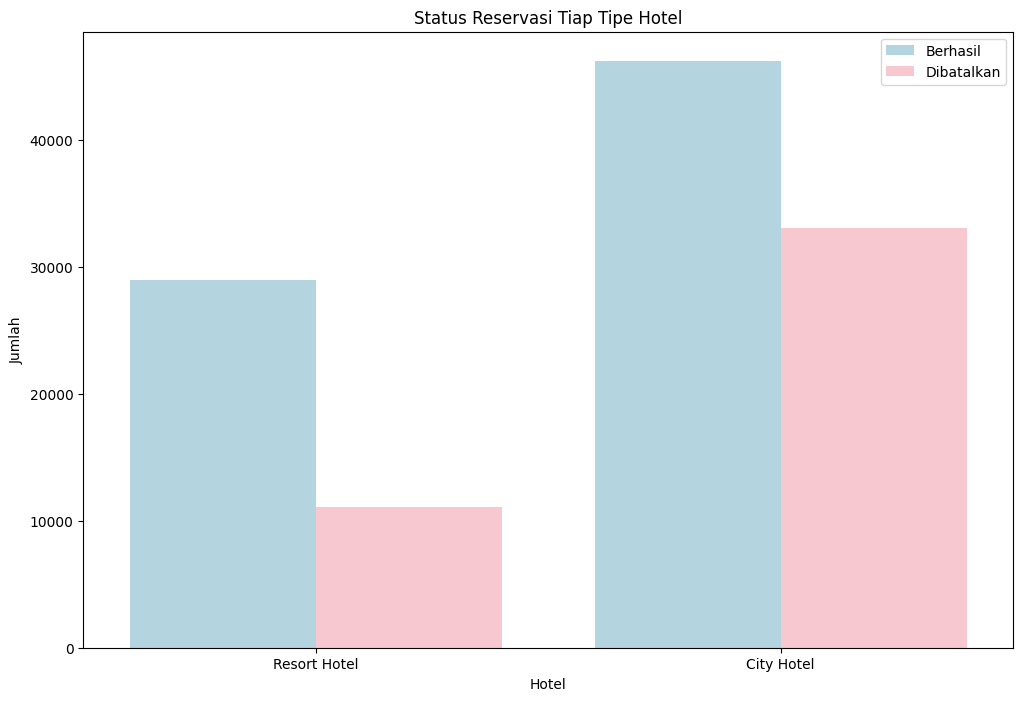

In [ ]:
plt.figure(figsize=(12, 8))

# Menggunakan variabel 'is_canceled' sebagai hue agar dapat menampilkan berdasarkan masing - masing hotel
ax1 = sns.countplot(
    x='hotel',
    hue='is_canceled',
    data=df,
    palette={0: '#ADD8E6', 1: '#FFC0CB'}
    )

legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))

plt.title('Status Reservasi Tiap Tipe Hotel')
plt.xlabel('Hotel',color='Black')
plt.ylabel('Jumlah', color='Black')
plt.legend(['Berhasil', 'Dibatalkan'])
plt.show()

### Banyaknya Pembatalan Reservasi Perbulan

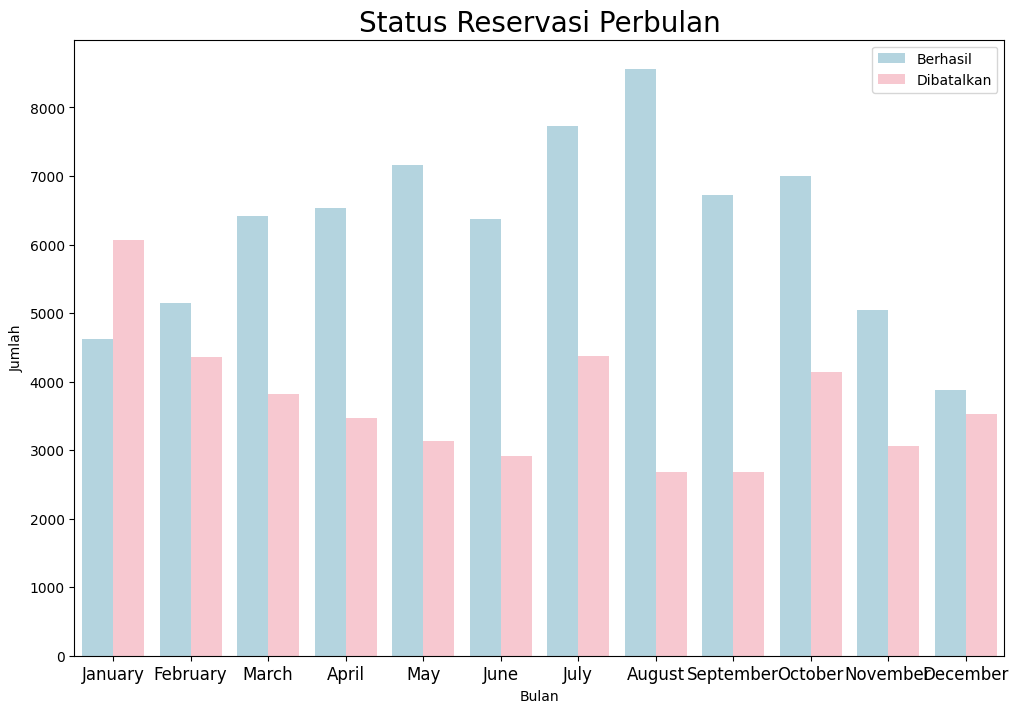

In [ ]:
# Mengubah variabel 'reservation_status_date' menjadi tipe data datetime untuk menyesuaikan dengan tujuan visualisasi
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Karena kita akan melakukan visualisasi perbulan, maka kita akan mengambil bagian bulan saja dan menjadikannya dalam satu variabel
df['month'] = df['reservation_status_date'].dt.month

# Visualisasi Data
plt.figure(figsize=(12,8))
ax1 = sns.countplot(x='month', hue='is_canceled', data= df, palette = palette)
legend_lebels,_ = ax1.get_legend_handles_labels()
plt.title('Status Reservasi Perbulan', size = 20)
plt.xticks(ticks=x, labels=months_order, fontsize=12)
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.legend(['Berhasil','Dibatalkan'])
plt.show()

### Jumlah Customer Reservasi Ulang

Untuk mengetahui karakteristik pelanggan, kita akan menghitung berapakah pelanggan yang melakukan reservasi ulang pada kedua hotel.

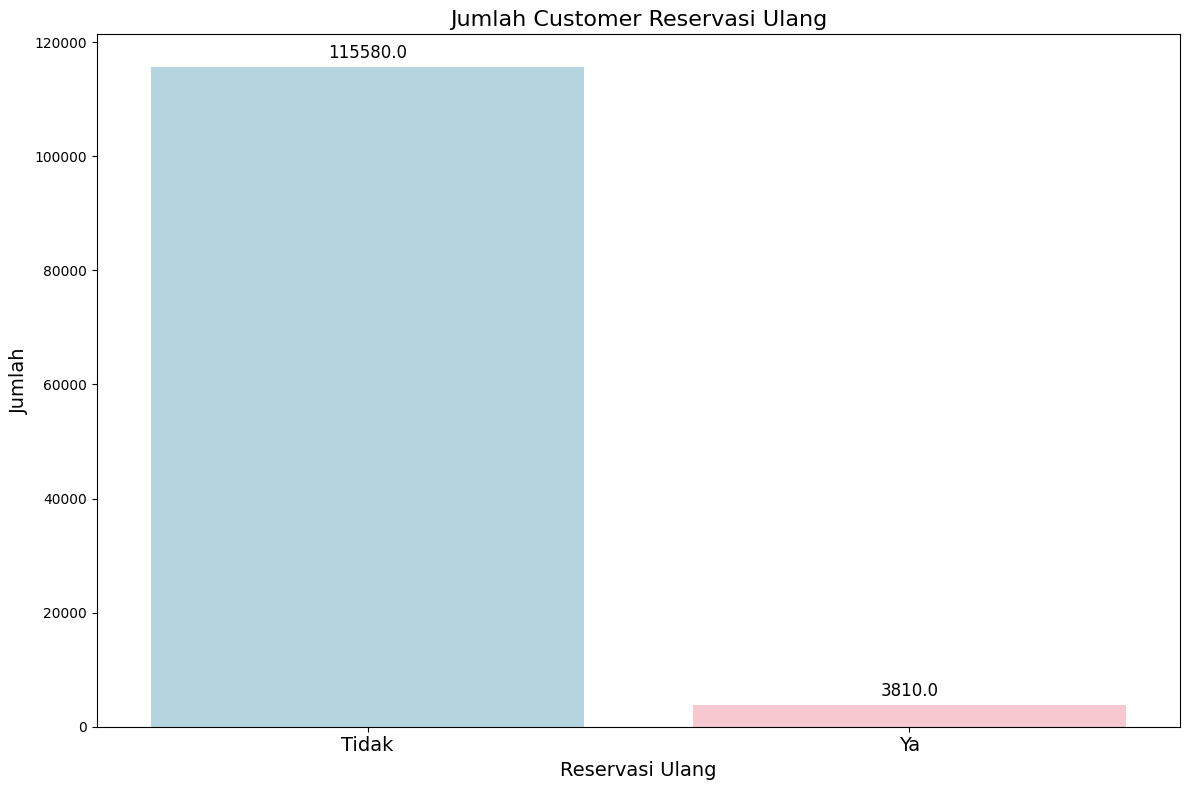

In [ ]:
# Visualisasi Data
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='is_repeated_guest', palette=palette) # Menggunakan variabel is_repeates_guest sebagai sumbu x
ax.set_title('Jumlah Customer Reservasi Ulang', fontsize=16, color='black')
ax.set_xticklabels(['Tidak', 'Ya'], fontsize=14)
plt.xlabel('Reservasi Ulang', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.yticks(fontsize=10)

# Menambahkan anotasi pada masing - masing bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()

###  Pembatalan Reservasi Berdasarkan Tipe Customer

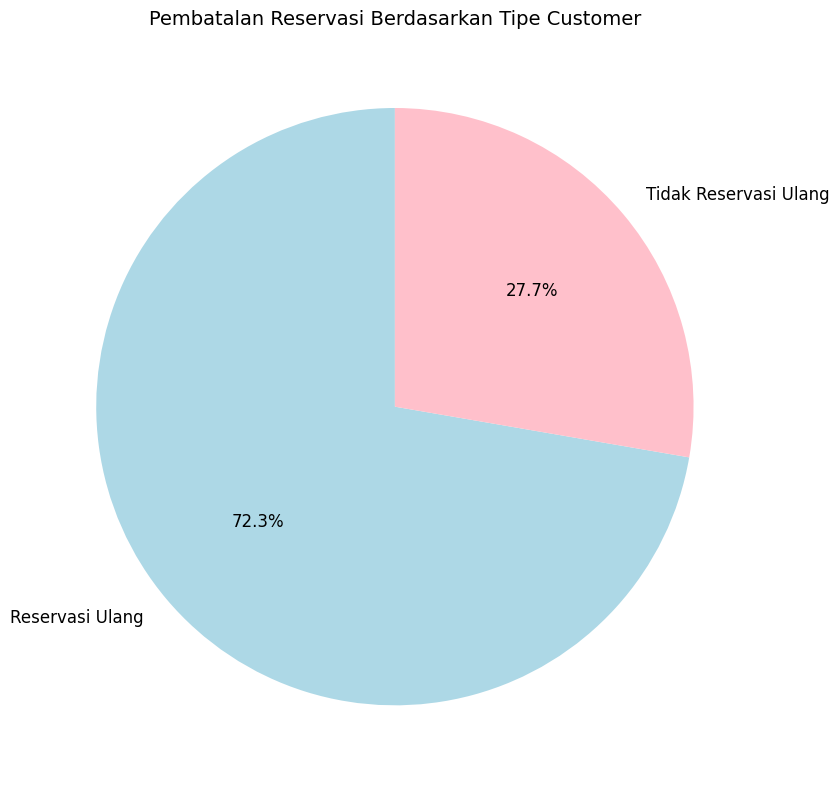

In [ ]:
# Mengelompokkan
repeated_guest_cancellation = df.groupby('is_repeated_guest')['is_canceled'].mean()
labels = repeated_guest_cancellation.index.map({0: 'Reservasi Ulang', 1: 'Tidak Reservasi Ulang'})
values = repeated_guest_cancellation.values * 100


fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors= palette,
    textprops={'fontsize': 12}
)

ax.set_title('Pembatalan Reservasi Berdasarkan Tipe Customer', fontsize=14)
plt.tight_layout()
plt.show()


### Distribusi Tipe Customer

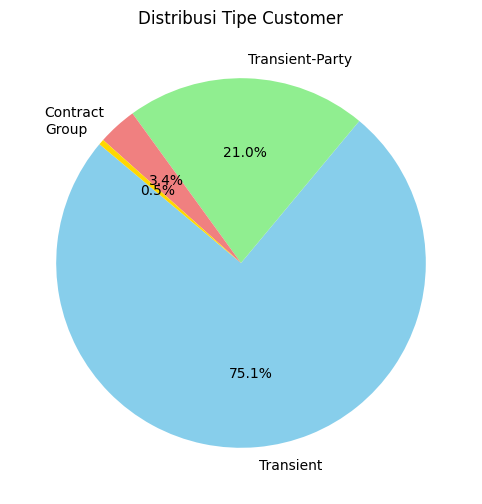

In [ ]:
customer_type_counts = df['customer_type'].value_counts()

colors = {
    'Transient': 'skyblue',
    'Contract': 'lightcoral',
    'Transient-Party': 'lightgreen',
    'Group': 'gold'
}

plt.figure(figsize=(8, 6))
plt.pie(
    customer_type_counts.values,
    labels=customer_type_counts.index,
    colors=[colors[key] for key in customer_type_counts.index],
    autopct='%1.1f%%',
    startangle=140
)

plt.title('Distribusi Tipe Customer')
plt.show()

### Negara Asal Customer

In [ ]:
origin_country = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
origin_country.columns = ['country', 'Number of guests']
origin_country

,country,Number of guests
0,PRT,21492
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [ ]:
fig = px.choropleth(origin_country ,locations=origin_country['country'], color=origin_country['Number of guests'], hover_name=origin_country['country'], title='Negara Asal Customer')
fig.show()

### 5 Negara dengan Jumlah Pembatalan Tertinggi

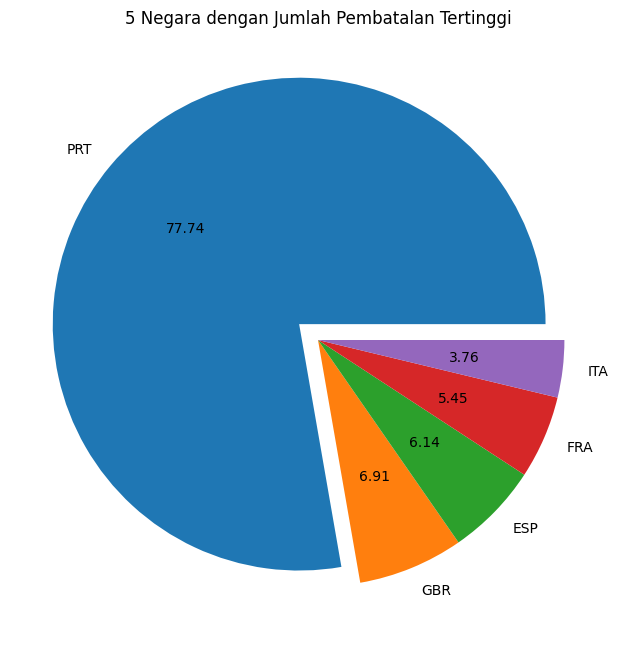

In [ ]:
cancelled_data= df[df['is_canceled']==1]
top_5_cancellation = cancelled_data['country'].value_counts()[:5]

most_cancelled_country = top_5_cancellation.idxmax()
explode = [0.1 if country == most_cancelled_country else 0 for country in top_5_cancellation.index]

plt.figure(figsize=(8,8))
plt.title('5 Negara dengan Jumlah Pembatalan Tertinggi',color="black")
plt.pie(top_5_cancellation, autopct ='%.2f', labels = top_5_cancellation.index, explode=explode)
plt.show()

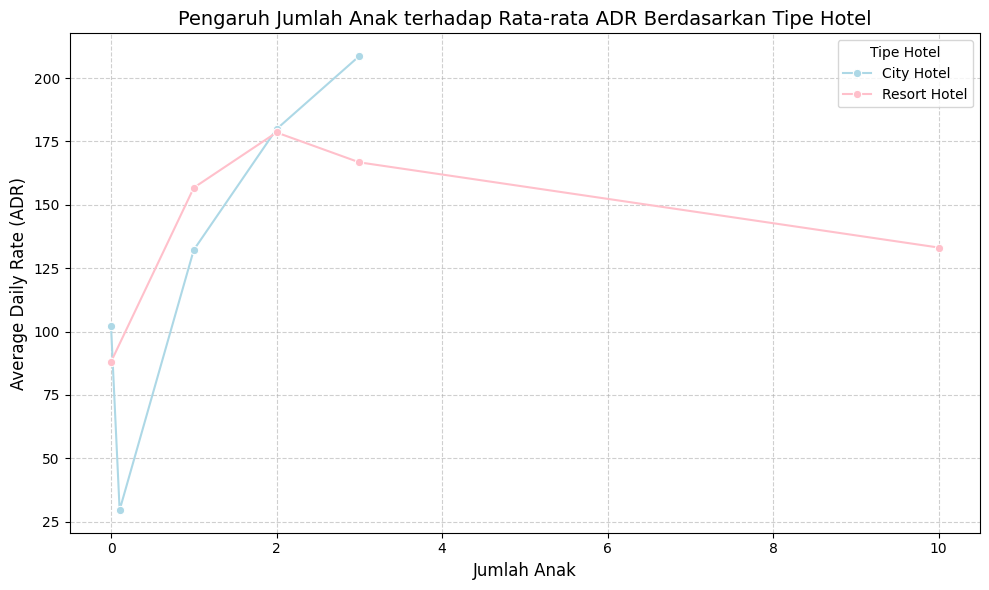

In [ ]:
grouped_data = df.groupby(['children', 'hotel'])['adr'].mean().reset_index()
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=grouped_data,
    x='children',
    y='adr',
    hue='hotel',
    marker='o',
    palette=palette
)

plt.title('Pengaruh Jumlah Anak terhadap Rata-rata ADR Berdasarkan Tipe Hotel', fontsize=14)
plt.xlabel('Jumlah Anak', fontsize=12)
plt.ylabel('Average Daily Rate (ADR)', fontsize=12)
plt.legend(title='Tipe Hotel', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


## Data Modelling

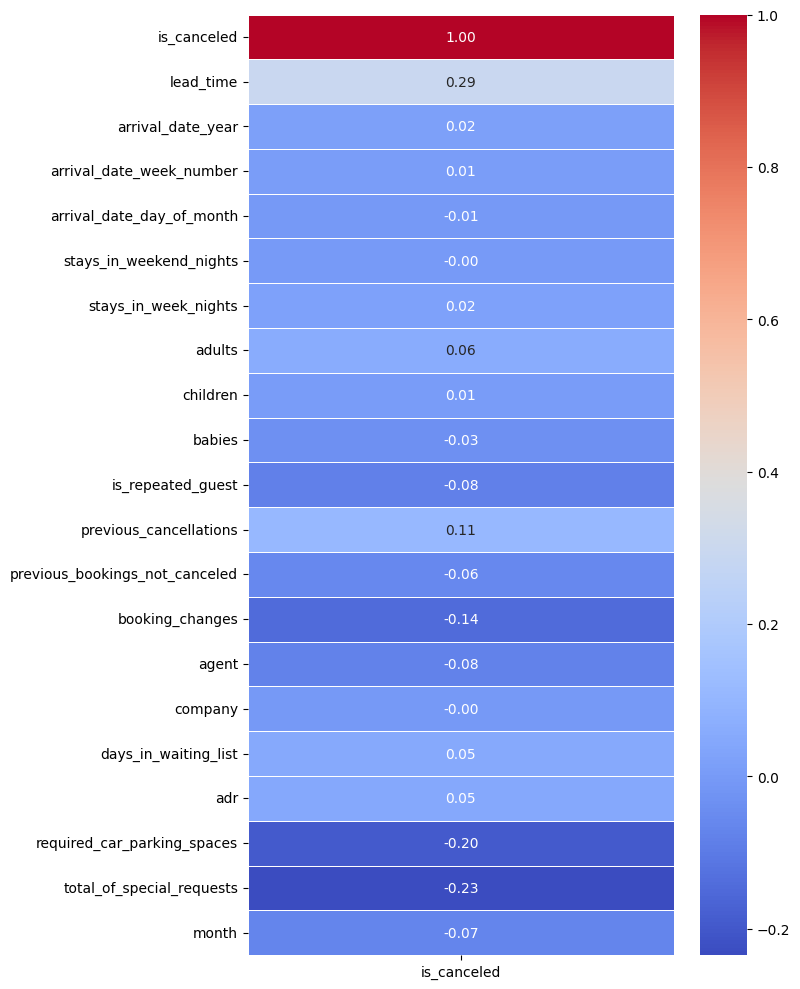

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_with_is_canceled = correlation_matrix[['is_canceled']]

plt.figure(figsize=(8, 10))
sns.heatmap(
    correlation_with_is_canceled,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar=True,
    linewidths=0.5
)
plt.tight_layout()
plt.show()


In [ ]:
drop_col = ['previous_bookings_not_canceled', 'arrival_date_year','country', 'required_car_parking_spaces','assigned_room_type', 'total_of_special_requests', 'agent', 'reservation_status','month']
df.drop(drop_col, axis=1, inplace=True)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,reserved_room_type,booking_changes,deposit_type,company,days_in_waiting_list,customer_type,adr,reservation_status_date
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,...,0,0,C,3,No Deposit,189.266735,0,Transient,0.0,2015-07-01
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,...,0,0,C,4,No Deposit,189.266735,0,Transient,0.0,2015-07-01
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,0,0,A,0,No Deposit,189.266735,0,Transient,75.0,2015-07-02
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,0,0,A,0,No Deposit,189.266735,0,Transient,75.0,2015-07-02
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,0,0,A,0,No Deposit,189.266735,0,Transient,98.0,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   hotel                      119390 non-null  object        
 1   is_canceled                119390 non-null  int64         
 2   lead_time                  119390 non-null  int64         
 3   arrival_date_month         119390 non-null  object        
 4   arrival_date_week_number   119390 non-null  int64         
 5   arrival_date_day_of_month  119390 non-null  int64         
 6   stays_in_weekend_nights    119390 non-null  int64         
 7   stays_in_week_nights       119390 non-null  int64         
 8   adults                     119390 non-null  int64         
 9   children                   119390 non-null  float64       
 10  babies                     119390 non-null  int64         
 11  meal                       119390 non-null  object  

In [ ]:
categorical_col = [col for col in df.columns if df[col].dtype in ['category', 'object', 'datetime']]
if 'reservation_status_date' in df.columns and 'reservation_status_date' not in categorical_col:
  categorical_col.append('reservation_status_date')
categorical_col

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [ ]:
cat_df = df[categorical_col]
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   hotel                    119390 non-null  object        
 1   arrival_date_month       119390 non-null  object        
 2   meal                     119390 non-null  object        
 3   market_segment           119390 non-null  object        
 4   distribution_channel     119390 non-null  object        
 5   reserved_room_type       119390 non-null  object        
 6   deposit_type             119390 non-null  object        
 7   customer_type            119390 non-null  object        
 8   reservation_status_date  119390 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(8)
memory usage: 8.2+ MB


In [ ]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])
cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [ ]:
cat_df.drop(['reservation_status_date', 'arrival_date_month'], axis = 1, inplace=True)

In [ ]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [ ]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [ ]:
cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB' : 2, 'SC': 3, 'Undefined': 4})
cat_df['market_segment']= cat_df['market_segment'].map({'Direct': 0, 'Corporate' : 1, 'Online TA': 2, 'Offline TA/TO': 3, 'Complementary': 4, 'Groups': 5,
                                                        'Undefined': 6, 'Aviation': 7})
cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3, 'GDS': 4})
cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C':0, 'A':1, 'D':2, 'E':3, 'G':4, 'F':5, 'H':6, 'L':7, 'P':8, 'B':9})
cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit':0, 'Refundable':1, 'Non Refund':2})
cat_df['customer_type'] = cat_df['customer_type'].map({'Transient':0, 'Contract':1, 'Transient-Party':2, 'Group':3})
cat_df['year']=cat_df['year'].map({2015:0, 2014:1, 2016:2, 2017:3})

In [ ]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0,0,0,0,7,1
1,0,0,0,0,0,0,0,0,7,1
2,0,0,0,0,1,0,0,0,7,2
3,0,0,1,1,1,0,0,0,7,2
4,0,0,2,2,1,0,0,0,7,3


In [ ]:
num_df = df.drop(columns = categorical_col, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,booking_changes,company,days_in_waiting_list,adr
0,342,27,1,0,0,2,0.0,0,0,0,3,189.266735,0,0.00
1,737,27,1,0,0,2,0.0,0,0,0,4,189.266735,0,0.00
2,7,27,1,0,1,1,0.0,0,0,0,0,189.266735,0,75.00
3,13,27,1,0,1,1,0.0,0,0,0,0,189.266735,0,75.00
4,14,27,1,0,2,2,0.0,0,0,0,0,189.266735,0,98.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,189.266735,0,96.14
119386,102,35,31,2,5,3,0.0,0,0,0,0,189.266735,0,225.43
119387,34,35,31,2,5,2,0.0,0,0,0,0,189.266735,0,157.71
119388,109,35,31,2,5,2,0.0,0,0,0,0,189.266735,0,104.40


In [ ]:
num_df.var()

,0
lead_time,11419.721511
arrival_date_week_number,185.099790
arrival_date_day_of_month,77.102966
stays_in_weekend_nights,0.997229
stays_in_week_nights,3.641554
adults,0.335543
children,0.158846
babies,0.009494
is_repeated_guest,0.030894
previous_cancellations,0.712904


In [ ]:
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['company'] = np.log(num_df['company'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [ ]:
num_df.var()

,0
lead_time,2.591420
arrival_date_week_number,0.441039
arrival_date_day_of_month,0.506267
stays_in_weekend_nights,0.997229
stays_in_week_nights,3.641554
adults,0.335543
children,0.158846
babies,0.009494
is_repeated_guest,0.030894
previous_cancellations,0.712904


In [ ]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

In [ ]:
num_df.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,booking_changes,company,days_in_waiting_list,adr
0,5.837730,3.332205,0.693147,0,0,2,0.0,0,0,0,3,5.248427,0,0.000000
1,6.603944,3.332205,0.693147,0,0,2,0.0,0,0,0,4,5.248427,0,0.000000
2,2.079442,3.332205,0.693147,0,1,1,0.0,0,0,0,0,5.248427,0,4.330733
3,2.639057,3.332205,0.693147,0,1,1,0.0,0,0,0,0,5.248427,0,4.330733
4,2.708050,3.332205,0.693147,0,2,2,0.0,0,0,0,0,5.248427,0,4.595120


In [ ]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']

In [ ]:
X.shape, y.shape

((119390, 24), (119390,))

### Splitting Data

Membagi data dengan rasio 0.7

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

### CatBoost

In [ ]:
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

Learning rate set to 0.5
0:	learn: 0.4953948	total: 64.6ms	remaining: 6.39s
1:	learn: 0.4259831	total: 79ms	remaining: 3.87s
2:	learn: 0.3791802	total: 95.3ms	remaining: 3.08s
3:	learn: 0.3393162	total: 112ms	remaining: 2.69s
4:	learn: 0.2788873	total: 131ms	remaining: 2.49s
5:	learn: 0.2526641	total: 146ms	remaining: 2.29s
6:	learn: 0.2430648	total: 169ms	remaining: 2.25s
7:	learn: 0.2155656	total: 185ms	remaining: 2.13s
8:	learn: 0.2099756	total: 204ms	remaining: 2.06s
9:	learn: 0.2011209	total: 222ms	remaining: 2s
10:	learn: 0.1755836	total: 238ms	remaining: 1.92s
11:	learn: 0.1533468	total: 253ms	remaining: 1.85s
12:	learn: 0.1409619	total: 270ms	remaining: 1.81s
13:	learn: 0.1351532	total: 286ms	remaining: 1.75s
14:	learn: 0.1296240	total: 304ms	remaining: 1.72s
15:	learn: 0.1249362	total: 319ms	remaining: 1.67s
16:	learn: 0.1180867	total: 334ms	remaining: 1.63s
17:	learn: 0.1141820	total: 350ms	remaining: 1.59s
18:	learn: 0.1132536	total: 369ms	remaining: 1.57s
19:	learn: 0.10903

In [ ]:
print(f"Accuracy Score of CatBoost Classifier is : {acc_cat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of CatBoost Classifier is : 0.9949186140659463
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     22559
           1       1.00      0.99      0.99     13258

    accuracy                           0.99     35817
   macro avg       1.00      0.99      0.99     35817
weighted avg       0.99      0.99      0.99     35817



### XGBoost

In [ ]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

In [ ]:
print(f"Accuracy Score of XGBoost Classifier is : {acc_xgb}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of XGBoost Classifier is : 0.9813217187369127
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     22559
           1       1.00      0.95      0.97     13258

    accuracy                           0.98     35817
   macro avg       0.99      0.97      0.98     35817
weighted avg       0.98      0.98      0.98     35817



### KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

In [ ]:
print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.8910573191501242
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     22559
           1       0.94      0.76      0.84     13258

    accuracy                           0.89     35817
   macro avg       0.90      0.86      0.88     35817
weighted avg       0.90      0.89      0.89     35817



In [ ]:
models = pd.DataFrame({'Model' : ['XGBoost', 'CatBoost', 'KNN'],
                      'Score': [acc_xgb, acc_cat, acc_knn]})

models.sort_values(by='Score', ascending=False)

,Model,Score
1,CatBoost,0.994919
0,XGBoost,0.981322
2,KNN,0.891057


In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', title = 'Models Comparison')

In [ ]:
!pip freeze > requirements.txt